# Introduction to Tangent Planes

In the previous modules, we learned everything about functions of one variable. Now, we will extend those concepts to functions with two or more variables.

The most important concept to generalize is the derivative.
* In one dimension, the derivative at a point gives us the slope of the **tangent line**.
* In two dimensions (for a function with two inputs), the derivative at a point gives us the **tangent plane**.

This concept of a tangent plane is the foundation for optimizing functions of multiple variables, which is the core of how most machine learning models are trained using algorithms like **Gradient Descent**.

---
## From Tangent Line to Tangent Plane

Recall the function $f(x) = x^2$. Its graph is a 2D parabola. At any point, we can find a unique tangent line that just "touches" the curve, and the slope of this line is the derivative.

Now, consider a function of two variables, such as $f(x, y) = x^2 + y^2$. This function's graph is a 3D surface (a paraboloid). Instead of a tangent line, we now have a **tangent plane** that touches the surface at a single point.

How do we find this plane? The key idea is to "slice" the 3D surface to turn the problem back into a simple 2D derivative problem that we already know how to solve.

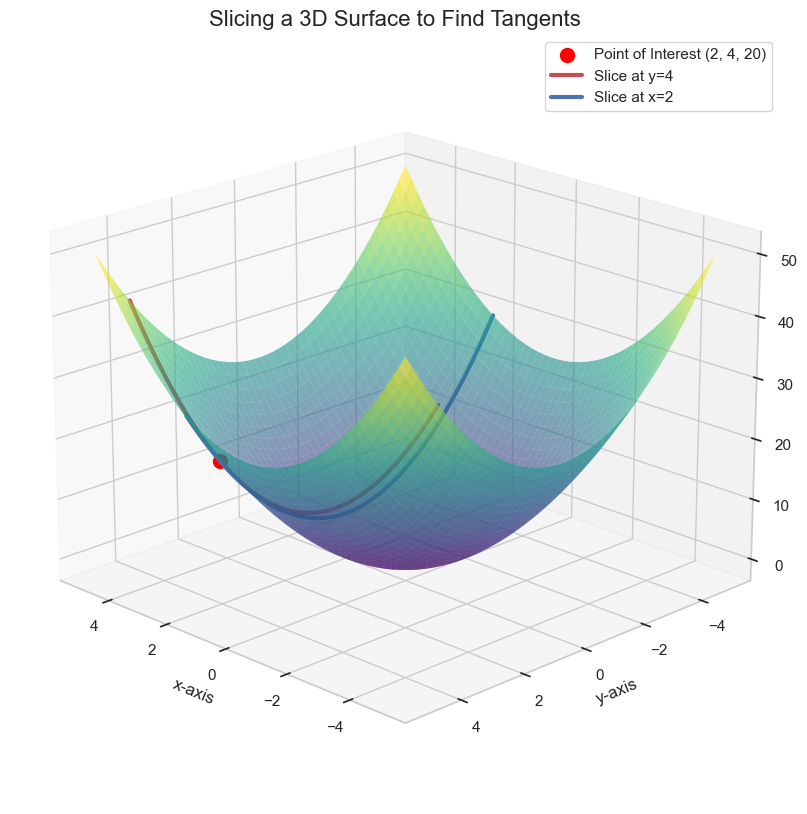

In [3]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the 3D function ---
def f(x, y):
    return x**2 + y**2

# --- Create the data for the 3D surface ---
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# --- Create the 3D plot ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the main surface
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis', rstride=1, cstride=1, edgecolor='none')

# --- Our point of interest ---
x0, y0 = 2, 4
z0 = f(x0, y0)
ax.scatter(x0, y0, z0, color='red', s=100, label='Point of Interest (2, 4, 20)')

# --- Slice 1: Fix y = 4 ---
x_slice1 = np.linspace(-5, 5, 50)
z_slice1 = f(x_slice1, y0)
ax.plot(x_slice1, np.full_like(x_slice1, y0), z_slice1, 'r-', linewidth=3, label='Slice at y=4')

# --- Slice 2: Fix x = 2 ---
y_slice2 = np.linspace(-5, 5, 50)
z_slice2 = f(x0, y_slice2)
ax.plot(np.full_like(y_slice2, x0), y_slice2, z_slice2, 'b-', linewidth=3, label='Slice at x=2')


# --- Format the plot ---
ax.set_title('Slicing a 3D Surface to Find Tangents', fontsize=16)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis (f(x,y))')
ax.legend()
ax.view_init(elev=20, azim=135)

plt.show()

---

## The "Slicing" Method

To find the tangent plane at a point, like `(2, 4)`, we can find two different tangent lines at that point and then combine them to form a plane.

1.  **Slice 1 (Fix y=4):** Imagine we slice our 3D surface with the plane `y = 4`. The intersection of these two surfaces is a simple 2D parabola.
    * Our function becomes: $f(x, 4) = x^2 + 4^2 = x^2 + 16$.
    * We can now take the derivative of this with respect to `x`: $f'(x) = 2x$.
    * At our point where `x=2`, the slope of the tangent line in this direction is $2(2) = 4$.  
` `
2.  **Slice 2 (Fix x=2):** Now imagine we slice the surface with the plane `x = 2`. The intersection is another 2D parabola.
    * Our function becomes: $f(2, y) = 2^2 + y^2 = 4 + y^2$.
    * We can take the derivative of this with respect to `y`: $f'(y) = 2y$.
    * At our point where `y=4`, the slope of the tangent line in this direction is $2(4) = 8$.

Since we have two distinct tangent lines that cross at our point of interest, they uniquely define the **tangent plane** to the surface at that point.

This process of finding the derivative by fixing all other variables is the core idea behind **partial derivatives**, which we will explore next.